In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the dataset
data = pd.read_csv("Churn_Modelling.csv")

In [4]:
# Displaying the rows of the dataset
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# Checking the shape (number of rows and columns) of the dataset
print(data.shape)

(10000, 14)


In [6]:
# Displaying summary statistics of the dataset
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
# Checking for missing values in the dataset
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
# Dropping missing values in the dataset
data.dropna(axis=0)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [9]:
# Dropping missing Values in the columns of the dataset
columns_with_nulls = ['Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited']
data = data.dropna(subset=columns_with_nulls)

In [10]:
# Checking for missing values in the dataset
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
# Replacing duplicates with sum of that column
data.duplicated().sum()

0

In [12]:
# Displaying the columns of the dataset
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [13]:
# Defining the Features/Independent Variables (X)
X = data.iloc[:,3:13]
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [14]:
# Defining the Target variable/Dependent Variable (y)
y = data.iloc[:,13]
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

Male      5457
Female    4543
Name: Gender, dtype: int64


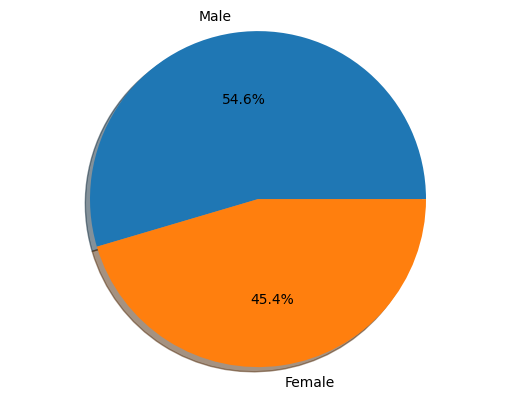

In [15]:
labels = ['Male','Female']
sizes = X['Gender'].value_counts()
print(sizes)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

<Axes: xlabel='Geography', ylabel='Exited'>

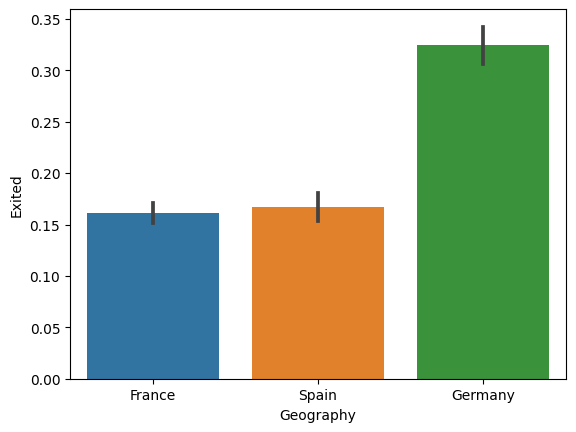

In [16]:
sns.barplot(x='Geography', y='Exited', data=data)

<Axes: xlabel='Gender', ylabel='Exited'>

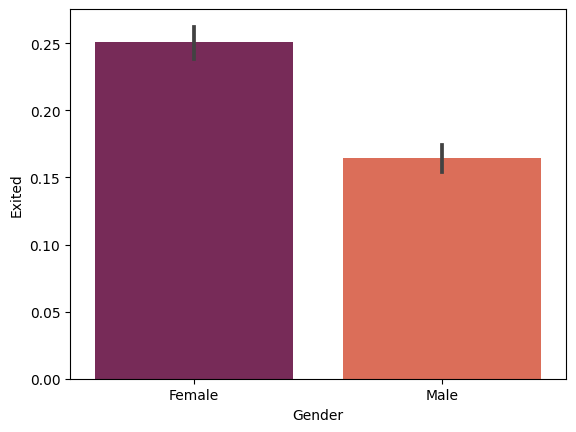

In [17]:
sns.barplot(x='Gender', y='Exited', data=data,palette='rocket')

In [18]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
X['Gender'] = label.fit_transform(X['Gender'])
print(X['Gender'].head(10))

0    0
1    0
2    0
3    0
4    0
5    1
6    1
7    0
8    1
9    1
Name: Gender, dtype: int32


In [19]:
X['Geography']=label.fit_transform(X['Geography'])
print(X['Geography'].head())
X['Geography'].value_counts()

0    0
1    2
2    0
3    0
4    2
Name: Geography, dtype: int32


0    5014
1    2509
2    2477
Name: Geography, dtype: int64

In [20]:
# Splitting the dataset 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.35,random_state=42)

In [21]:
# Standardize input data using StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [22]:
# Shape of train and test data
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (6500, 10) (6500,)
Test set: (3500, 10) (3500,)


In [23]:
# Importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [24]:
# Model 1: Logistic Regression
logistic_model = LogisticRegression()
logistic_model=logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

In [25]:
# Model 2: Random Forest
forest_model = RandomForestClassifier(n_estimators=50,max_depth = 5,random_state = 2)
forest_model=forest_model.fit(X_train, y_train)
forest_predictions = forest_model.predict(X_test)

In [26]:
# Model 3: Gradient Boosting
boosting_model = xgb.XGBClassifier(objective='binary:logistic')  
boosting_model=boosting_model.fit(X_train, y_train)
boosting_predictions = boosting_model.predict(X_test)

In [27]:
name = {
    "LR": logistic_model,
    "RFC":forest_model , 
    "GB":boosting_model,  
}

In [28]:
#Evaluation
def evaluate_model(name, predictions):
    print(f"------- {name} -------")
    print("Accuracy:", accuracy_score(y_test, predictions))
    print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
    print("Classification Report:\n", classification_report(y_test, predictions))

In [29]:
# Displaying predictions of logistic regression model
print(logistic_predictions)

[0 0 0 ... 0 0 0]


In [30]:
# Displaying predictions of Random Forest model
print(forest_predictions)

[0 0 0 ... 0 0 1]


In [31]:
# Displaying predictions of Gradient Boosting model
print(boosting_predictions)

[0 0 0 ... 0 0 1]


In [32]:
# Evaluating logistic Regression model
evaluate_model("Logistic Regression", logistic_predictions)

------- Logistic Regression -------
Accuracy: 0.8125714285714286
Confusion Matrix:
 [[2728   75]
 [ 581  116]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      2803
           1       0.61      0.17      0.26       697

    accuracy                           0.81      3500
   macro avg       0.72      0.57      0.58      3500
weighted avg       0.78      0.81      0.77      3500



In [33]:
# Evaluating Random Forest model
evaluate_model("Random Forest", forest_predictions)

------- Random Forest -------
Accuracy: 0.8597142857142858
Confusion Matrix:
 [[2762   41]
 [ 450  247]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      2803
           1       0.86      0.35      0.50       697

    accuracy                           0.86      3500
   macro avg       0.86      0.67      0.71      3500
weighted avg       0.86      0.86      0.84      3500



In [34]:
# Evaluating Gradient Boosting model
evaluate_model("Gradient Boosting", boosting_predictions)

------- Gradient Boosting -------
Accuracy: 0.8574285714285714
Confusion Matrix:
 [[2657  146]
 [ 353  344]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      2803
           1       0.70      0.49      0.58       697

    accuracy                           0.86      3500
   macro avg       0.79      0.72      0.75      3500
weighted avg       0.85      0.86      0.85      3500

